In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load cryptocurrency data
crypto_data = pd.read_csv('data/CRYPTOCURRENCY.csv')
crypto_data

,coin,symbol,price(USD),1h_Price_Change,24h_Price_Change,7d_Price_Change,24h_volume,Market_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [20]:
crypto_data.shape

(500, 9)

In [21]:
crypto_data.size

4500

In [22]:
# Perform Data Cleaning and Data preprocessing
crypto_data.drop_duplicates(inplace=True)  # Drop duplicate rows

In [23]:
# Check for missing values
print(crypto_data.isnull().sum())

coin                0
symbol              0
price(USD)          0
1h_Price_Change     3
24h_Price_Change    3
7d_Price_Change     3
24h_volume          3
Market_cap          0
date                0
dtype: int64


In [24]:
# Remove rows with NaN values in  columns
crypto_data.dropna(inplace=True)

In [25]:
# Save the cleaned and preprocessed data to a new CSV file
crypto_data.to_csv('cleaned_cryptocurrency_data.csv', index=False)

In [27]:
# Feature Selection: Select relevant columns
selected_columns = ['coin','symbol','price(USD)','1h_Price_Change','24h_Price_Change','7d_Price_Change','24h_volume','Market_cap','date']
crypto_data = crypto_data[selected_columns]

In [28]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

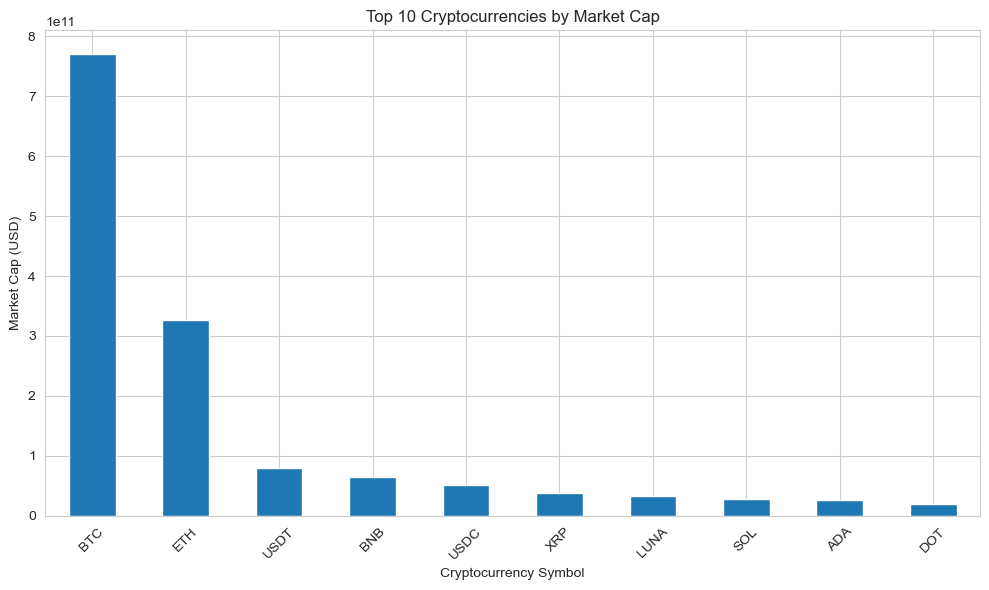

In [32]:
# Visualization : Top 10 Cryptocurrencies by Market Cap
top_10_by_mkt_cap = crypto_data.groupby('symbol')['Market_cap'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_by_mkt_cap.plot(kind='bar')
plt.title('Top 10 Cryptocurrencies by Market Cap')
plt.xlabel('Cryptocurrency Symbol')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Additional Analysis: Top Performing Cryptocurrencies by 7-day Percentage Change
top_performing = crypto_data.nlargest(5, '7d_Price_Change')[['symbol', '7d_Price_Change']]
print("Top Performing Cryptocurrencies by 7-day Price Change:")
print(top_performing)

Top Performing Cryptocurrencies by 7-day Price Change:
     symbol  7d_Price_Change
182     GMT            2.935
407  ALPINE            1.718
368  MSHARE            0.922
409   JASMY            0.913
54     RUNE            0.769


In [36]:
# Additional Analysis: Cryptocurrencies with Highest and Lowest Price
highest_price = crypto_data.nlargest(1, 'price(USD)')[['symbol', 'price(USD)']]
lowest_price = crypto_data.nsmallest(1, 'price(USD)')[['symbol', 'price(USD)']]
print("\nCryptocurrency with Highest Price:")
print(highest_price)
print("\nCryptocurrency with Lowest Price:")
print(lowest_price)


Cryptocurrency with Highest Price:
   symbol  price(USD)
68   HBTC    41217.27

Cryptocurrency with Lowest Price:
    symbol    price(USD)
315  KISHU  1.544000e-09


In [31]:
# User Input: Minimum and Maximum Price
min_price = float(input("Enter minimum price: "))
max_price = float(input("Enter maximum price: "))

# User Input: High Market Cap Checkbox
high_market_cap = input("Do you want to filter by high market cap? (y/n): ").lower() == 'y'

# Filter Cryptocurrencies based on User Input
filtered_crypto = crypto_data[(crypto_data['price(USD)'] >= min_price) &
                              (crypto_data['price(USD)'] <= max_price)]

if high_market_cap:
    filtered_crypto = filtered_crypto[filtered_crypto['Market_cap'] > filtered_crypto['Market_cap'].median()]

# Sort by highest 7-day percentage change within the filtered cryptocurrencies
recommended_crypto = filtered_crypto.sort_values(by='7d_Price_Change', ascending=False).head(10)

# Display Recommended Cryptocurrencies with Symbols, Prices, and 7-Day Percentage Changes in a Table
recommended_table = recommended_crypto[['coin','symbol','price(USD)','1h_Price_Change','24h_Price_Change','7d_Price_Change','24h_volume','Market_cap','date']]
recommended_table.columns = ['coin','symbol','price(USD)','1h_Price_Change','24h_Price_Change','7d_Price_Change','24h_volume','Market_cap','date']
print("\nTop Recommended Cryptocurrencies:")
print(recommended_table.to_string(index=False))


Top Recommended Cryptocurrencies:
                    coin symbol  price(USD)  1h_Price_Change  24h_Price_Change  7d_Price_Change   24h_volume   Market_cap       date
                   Maker    MKR     1982.58            0.029             0.071            0.129 9.284773e+07 1.772468e+09 2022-03-16
       Lido Staked Ether  STETH     2745.31            0.026             0.035            0.067 2.032703e+07 6.972220e+09 2022-03-16
                Ethereum    ETH     2744.41            0.024             0.034            0.065 1.974870e+10 3.271044e+11 2022-03-16
                 Bitcoin    BTC    40859.46            0.022             0.030            0.055 3.539076e+10 7.709915e+11 2022-03-16
         Wrapped Bitcoin   WBTC    40820.44            0.020             0.030            0.055 4.430456e+08 1.107764e+10 2022-03-16
Interest Bearing Bitcoin  IBBTC    40647.97            0.019             0.023            0.052 3.253900e+03 1.876183e+08 2022-03-16
                  renBTC RENBTC   